In [2]:
import pandas as pd

In [8]:
df= pd.read_csv('combined_model/strategy_result_lstm_7/净值数据_20221101_20230913.csv')
# date作为索引
df.set_index('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 2022-11-01 to 2023-09-13
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_market_value     215 non-null    float64
 1   cash_balance           215 non-null    float64
 2   total_asset_value      215 non-null    float64
 3   shares                 215 non-null    float64
 4   nav                    215 non-null    float64
 5   strategy_yield         215 non-null    float64
 6   strategy_yield_daily   215 non-null    float64
 7   strategy_drawdown      215 non-null    float64
 8   profit_loss            215 non-null    int64  
 9   benchmark_price        215 non-null    float64
 10  benchmark_yield        215 non-null    float64
 11  benchmark_yield_daily  215 non-null    float64
 12  benchmark_drawdown     215 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 23.5+ KB


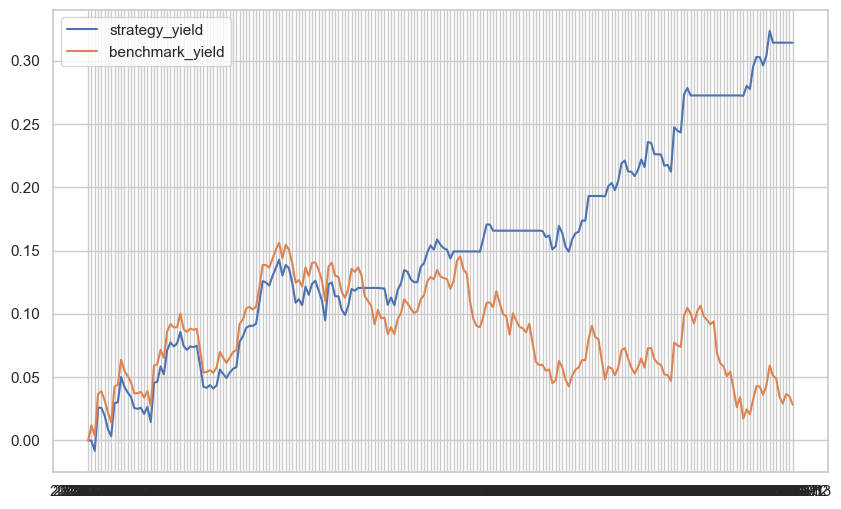

In [10]:
# 画一下strategy_yield和benchmark_yield曲线

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['strategy_yield'], label='strategy_yield')
plt.plot(df['benchmark_yield'], label='benchmark_yield')
plt.legend()
plt.show()

In [2]:
import  pandas as pd

config_id = 6

model_results = pd.read_excel(f'best_models_results/best_models_results_{config_id}.xlsx')
# 修改列名 best_model_path为model_path
model_results.rename(columns={'best_model_path':'model_path'},inplace=True)
model_results.info()

from model.LSTM_base_model import lstm_evaluate
from tqdm import tqdm

r2_list = []
# 遍历 model_results 每行
# for i in range(0,len(model_results)):
for i in tqdm(range(0,len(model_results))):
    model_dict = model_results.iloc[i].to_dict()
    T,r2 = lstm_evaluate(model_dict, "val",only_r2=True)
    # 将(T,r2)加入列表
    r2_list.append((T, r2))
# save
pd.DataFrame(r2_list,columns=['T','R2']).to_excel(f'../results/LSTM/lstm_val_T_R2_6.xlsx',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   T              1080 non-null   int64 
 1   window_size    1080 non-null   int64 
 2   hidden_dim     1080 non-null   int64 
 3   num_layers     1080 non-null   int64 
 4   best_val_loss  1080 non-null   int64 
 5   model_path     1080 non-null   object
dtypes: int64(5), object(1)
memory usage: 50.8+ KB


100%|██████████| 1080/1080 [24:21<00:00,  1.35s/it]
